In [1]:
import sys

import numpy as np
from process_bigraph import pp

sys.path.insert(0, '..')

In [2]:
"""
Interpretation of Metrics
Low Inner Product & High MSE/RMSE:

Description: Simulators produce outputs that are different both in magnitude and direction.
Example: If inner_product_matrix[0, 2] is low and mse_matrix[0, 2] is high, copasi and amici are very different.
High Inner Product & Low MSE/RMSE:

Description: Simulators produce very similar and aligned outputs.
Example: If inner_product_matrix[0, 1] is high and mse_matrix[0, 1] is low, copasi and tellurium are very similar.
High Inner Product & High MSE/RMSE:

Description: Simulators produce outputs that are aligned in direction but have significant differences in magnitude.
Example: This scenario might indicate systematic biases in the simulators' outputs.
Low Inner Product & Low MSE/RMSE:

Description: Simulators produce similar outputs, but the alignment is not perfect.
Example: This might indicate outputs that are close but vary slightly in their direction.
"""

"\nInterpretation of Metrics\nLow Inner Product & High MSE/RMSE:\n\nDescription: Simulators produce outputs that are different both in magnitude and direction.\nExample: If inner_product_matrix[0, 2] is low and mse_matrix[0, 2] is high, copasi and amici are very different.\nHigh Inner Product & Low MSE/RMSE:\n\nDescription: Simulators produce very similar and aligned outputs.\nExample: If inner_product_matrix[0, 1] is high and mse_matrix[0, 1] is low, copasi and tellurium are very similar.\nHigh Inner Product & High MSE/RMSE:\n\nDescription: Simulators produce outputs that are aligned in direction but have significant differences in magnitude.\nExample: This scenario might indicate systematic biases in the simulators' outputs.\nLow Inner Product & Low MSE/RMSE:\n\nDescription: Simulators produce similar outputs, but the alignment is not perfect.\nExample: This might indicate outputs that are close but vary slightly in their direction.\n"

### Demonstrate a simple example with sample output data for a sample timestep manually

In [3]:
biomodel_id = 'BIOMD0000000744'
duration = 400

# sample time series outputs from three simulators
output_copasi = np.array([1.3, 2.4, 4.3, 5.6, 6.7])
output_tellurium = np.array([1.3, 2.4, 4.5, 5.7, 6.8])
output_amici = np.array([1.3, 2.4, 4.6, 5.8, 7.0])
interval_outputs = [output_copasi, output_tellurium, output_amici]
feature_names = ['param_a', 'param_b', 'param_c', 'param_d', 'param_e']

# sample time id for a random interval in the range of duration
time_id = np.random.randint(0, duration)

In [4]:
from biosimulator_processes.data_model.compare_data_model import ODEProcessIntervalComparison, ODEComparisonResult
from biosimulator_processes.verify.exec import generate_ode_process_interval_comparison_data, plot_ode_process_comparison

CobraProcess registered successfully.
CopasiProcess registered successfully.
_CopasiProcess registered successfully.
SmoldynProcess registered successfully.
TelluriumProcess registered successfully.
AmiciProcess registered successfully.
ODEComparatorProcess registered successfully.
GetSbmlStep registered successfully.
CompositionPlotter registered successfully.
Plotter2d registered successfully.
ODEComparatorStep registered successfully.


In [5]:
# generate object with comparison dataframes for sample data
interval_comparison_data: ODEProcessIntervalComparison = generate_ode_process_interval_comparison_data(interval_outputs, time_id)

# show time id for sample interval
interval_comparison_data.time_id

92

In [6]:
# show mse data
interval_comparison_data.mse_data

,copasi,tellurium,amici
copasi,0.000,0.012,0.044
tellurium,0.012,0.000,0.012
amici,0.044,0.012,0.000


In [7]:
# show inner product data 
interval_comparison_data.inner_prod_data

,copasi,tellurium,amici
copasi,102.19,104.28,106.61
tellurium,104.28,106.43,108.81
amici,106.61,108.81,111.25


In [8]:
# show rmse data 
interval_comparison_data.rmse_data

,copasi,tellurium,amici
copasi,0.000000,0.109545,0.209762
tellurium,0.109545,0.000000,0.109545
amici,0.209762,0.109545,0.000000


In [9]:
# show outer product data
pp(interval_comparison_data.outer_prod_data)

{ ('amici', 'amici'): array([[ 1.69,  3.12,  5.98,  7.54,  9.1 ],
       [ 3.12,  5.76, 11.04, 13.92, 16.8 ],
       [ 5.98, 11.04, 21.16, 26.68, 32.2 ],
       [ 7.54, 13.92, 26.68, 33.64, 40.6 ],
       [ 9.1 , 16.8 , 32.2 , 40.6 , 49.  ]]),
  ('copasi', 'amici'): array([[ 1.69,  3.12,  5.98,  7.54,  9.1 ],
       [ 3.12,  5.76, 11.04, 13.92, 16.8 ],
       [ 5.59, 10.32, 19.78, 24.94, 30.1 ],
       [ 7.28, 13.44, 25.76, 32.48, 39.2 ],
       [ 8.71, 16.08, 30.82, 38.86, 46.9 ]]),
  ('copasi', 'copasi'): array([[ 1.69,  3.12,  5.59,  7.28,  8.71],
       [ 3.12,  5.76, 10.32, 13.44, 16.08],
       [ 5.59, 10.32, 18.49, 24.08, 28.81],
       [ 7.28, 13.44, 24.08, 31.36, 37.52],
       [ 8.71, 16.08, 28.81, 37.52, 44.89]]),
  ('copasi', 'tellurium'): array([[ 1.69,  3.12,  5.85,  7.41,  8.84],
       [ 3.12,  5.76, 10.8 , 13.68, 16.32],
       [ 5.59, 10.32, 19.35, 24.51, 29.24],
       [ 7.28, 13.44, 25.2 , 31.92, 38.08],
       [ 8.71, 16.08, 30.15, 38.19, 45.56]]),
  ('tellurium', 

### Now, perform this analysis over an interation of real ode simulator composite data

In [10]:
# 1. generate a comparison output which initializes data on construction
ode_process_comparison_output = ODEComparisonResult(duration=duration, num_steps=400, biomodel_id=biomodel_id)

2024-05-16 09:31:19.126 - amici.sbml_import - INFO - Finished importing SBML                         (2.69E-02s)
2024-05-16 09:31:19.147 - amici.sbml_import - INFO - Finished processing SBML observables            (1.90E-02s)
2024-05-16 09:31:19.149 - amici.sbml_import - INFO - Finished processing SBML event observables      (7.91E-07s)
2024-05-16 09:31:19.173 - amici.de_model - INFO - Finished computing xdot                            (1.59E-03s)
2024-05-16 09:31:19.177 - amici.de_model - INFO - Finished computing x0                              (1.64E-03s)
2024-05-16 09:31:19.208 - amici.de_model - INFO - Finished computing w                               (1.79E-02s)


found a filepath


2024-05-16 09:31:19.529 - amici.de_export - INFO - Finished generating cpp code                      (3.17E-01s)
2024-05-16 09:31:27.868 - amici.de_export - INFO - Finished compiling cpp code                       (8.34E+00s)
/Users/alexanderpatrie/Desktop/repos/biosimulator-processes/demos/../biosimulator_processes/processes/copasi_process.py:205: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



In [11]:
# 1a. show a small sample of the output data
pp(ode_process_comparison_output.outputs[:2])

[ ODEIntervalResult(interval_id=0.0,
                    copasi_floating_species_concentrations={ 'v': 0.0,
                                                             'w': 0.0,
                                                             'x': 0.0,
                                                             'y': 0.0,
                                                             'z': 0.0},
                    tellurium_floating_species_concentrations={ 'v': 0.0,
                                                                'w': 0.0,
                                                                'x': 0.0,
                                                                'y': 0.0,
                                                                'z': 0.0},
                    amici_floating_species_concentrations={ 'v': 0.0,
                                                            'w': 0.0,
                                                            'x': 0.0,
                          

In [12]:
from biosimulator_processes.verify.exec import generate_interval_comparisons

# 2. generate comparison data for all intervals
all_interval_comparisons = generate_interval_comparisons(ode_process_comparison_output)

# 2a. pick a random index from the length of comparisons
interval_index = np.random.randint(0, len(all_interval_comparisons))    

In [13]:
# 3. show mse data from random index
interval_mse = all_interval_comparisons[interval_index].mse_data

interval_mse

,copasi,tellurium,amici
copasi,0.000000e+00,1.423025e+65,1.423025e+65
tellurium,1.423025e+65,0.000000e+00,5.180653e+20
amici,1.423025e+65,5.180653e+20,0.000000e+00


In [14]:
# 3a. show rmse data
interval_rmse = all_interval_comparisons[interval_index].rmse_data

interval_rmse

,copasi,tellurium,amici
copasi,0.000000e+00,3.772301e+32,3.772301e+32
tellurium,3.772301e+32,0.000000e+00,2.276105e+10
amici,3.772301e+32,2.276105e+10,0.000000e+00


In [15]:
# 3b. show inner product data 
interval_inner_prod = all_interval_comparisons[interval_index].inner_prod_data

interval_inner_prod

,copasi,tellurium,amici
copasi,7.115126e+65,3.962599e+35,1.386043e+42
tellurium,3.962599e+35,1.223583e+10,1.050849e+15
amici,1.386043e+42,1.050849e+15,2.590328e+21


In [16]:
# 3c. show outer prod data for indices within interval
pp(all_interval_comparisons[interval_index].outer_prod_data)

{ ('amici', 'amici'): array([[2.500e+21, 1.400e+19, 4.750e+20, 1.250e+17, 2.350e+13],
       [1.400e+19, 7.840e+16, 2.660e+18, 7.000e+14, 1.316e+11],
       [4.750e+20, 2.660e+18, 9.025e+19, 2.375e+16, 4.465e+12],
       [1.250e+17, 7.000e+14, 2.375e+16, 6.250e+12, 1.175e+09],
       [2.350e+13, 1.316e+11, 4.465e+12, 1.175e+09, 2.209e+05]]),
  ('copasi', 'amici'): array([[1.35016695e+42, 7.56093494e+39, 2.56531721e+41, 6.75083477e+37,
        1.26915694e+34],
       [1.28020019e+40, 7.16912104e+37, 2.43238035e+39, 6.40100093e+35,
        1.20338817e+32],
       [1.79115615e+41, 1.00304744e+39, 3.40319668e+40, 8.95578074e+36,
        1.68368678e+33],
       [3.54386837e+43, 1.98456629e+41, 6.73334990e+42, 1.77193418e+39,
        3.33123626e+35],
       [2.28259931e+43, 1.27825561e+41, 4.33693869e+42, 1.14129965e+39,
        2.14564335e+35]]),
  ('copasi', 'copasi'): array([[7.29180322e+62, 6.91393594e+60, 9.67343936e+61, 1.91392558e+64,
        1.23275606e+64],
       [6.91393594e+60, 6

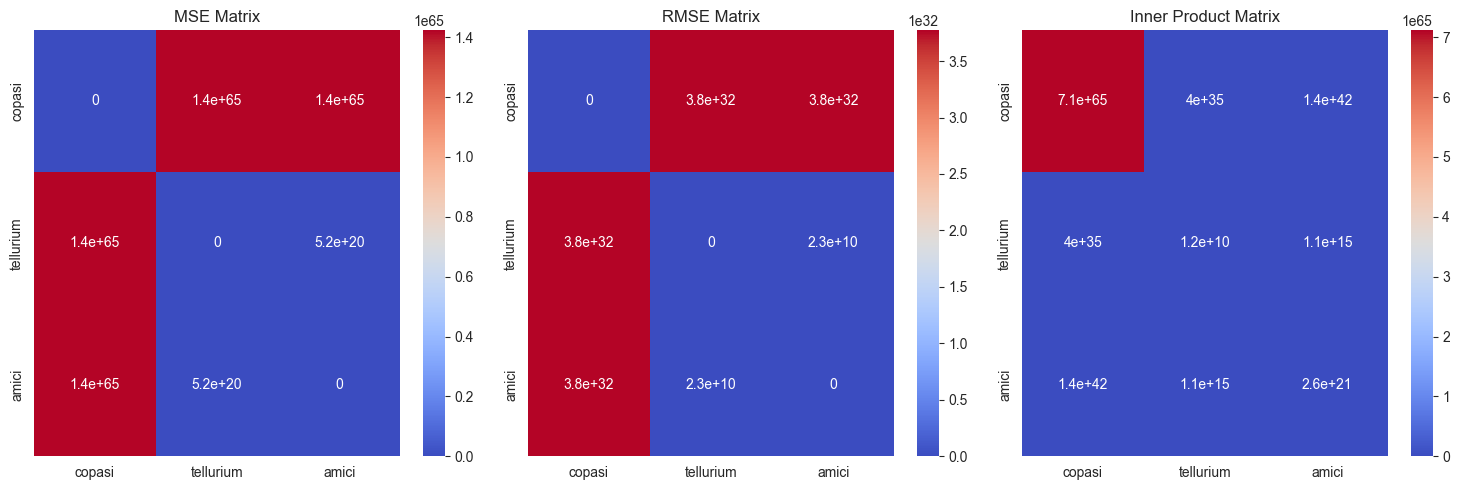

In [17]:
# 4. plot these outputs
plot_ode_process_comparison(interval_mse, interval_rmse, interval_inner_prod, outer_product_matrices=all_interval_comparisons[interval_index].outer_prod_data)